In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Non_hope_speech","Hope_speech"]

In [ ]:
header_list = ["text","intent","buffer"]
train = pd.read_csv("/content/english_hope_train.csv", '\t',header=None,names=header_list)

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
df_train = pd.DataFrame(train)
type(df_train)

pandas.core.frame.DataFrame

In [ ]:
del df_train['buffer']

In [ ]:
df_train["intent"] = df_train["intent"].replace(to_replace ="Non_hope_speech", value =0)
df_train["intent"] = df_train["intent"].replace(to_replace ="Hope_speech", value =1)
df_train["intent"] = df_train["intent"].replace(to_replace ="not-English", value =2)
df_train["intent"].unique()

array([0, 1, 2])

In [ ]:
df_train.head(9)

,text,intent
0,these tiktoks radiate gay chaotic energy and i...,0
1,@Champions Again He got killed for using false...,0
2,It's not that all lives don't matter,0
3,Is it really that difficult to understand? Bla...,0
4,Whenever we say black isn't that racists? Why...,0
5,Ros The Boss u don’t know that she’s actually ...,0
6,That was funny at the end when Larry said 'Wha...,0
7,She saves lives with her music.,0
8,There were a lot of Samoans in my Army unit,0


In [ ]:
# df_train["intent"].nunique()
pd.value_counts(df_train["intent"] == 2)

False    22740
True        22
Name: intent, dtype: int64

In [ ]:
#Create independent and Dependent Features
columns = df_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["intent"]]
# Store the variable we are predicting 
target = "intent"
# Define a random state 
state = np.random.RandomState(42)
X = df_train[columns]
Y = df_train[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(22762, 1)
(22762,)


In [ ]:
df_train.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

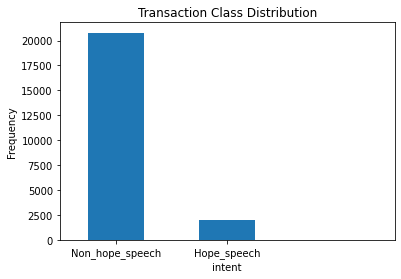

In [ ]:
count_classes = pd.value_counts(df_train['intent'])

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("intent")

plt.ylabel("Frequency")

In [ ]:
Hope = df_train[df_train['intent']==1]

nhope = df_train[df_train['intent']==0]

In [ ]:
print(Hope.shape,nhope.shape)

(1962, 2) (20778, 2)


In [ ]:
#import the necessary libraries for dataset preparation, feature engineering, model training
from sklearn import model_selection, preprocessing, metrics, linear_model, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
import pandas as pd, numpy, string
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
#Remove Special Charactors
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
type(df_train['intent'])

pandas.core.series.Series

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
df_train_tfidf=tfidf_vect.fit_transform(pd.Series(df_train['text']))
#df_train_tfidf =  tfidf_vect.transform(df_train['text'])
df_train_tfidf.shape
df_train.shape



(22762, 19016)

In [ ]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(df_train_tfidf, pd.Series(df_train['intent']))
v=pd.DataFrame(X_SMOTE.todense(), columns=tfidf_vect.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
v.head()

,0,000,006,01,020,04002283nncoronavirus,05,06,0603,0odragonfireo0,1,10,100,1000,100000,1000000,1000s,1000th,1004,100s,100th,100x,101,101nbut,105,10million,10th,10x,11,110,11000,1122,119,11nyou,11th,12,120,123,123evilol,125,...,şişman,ɢɪғᴛɪɴɢ,ɪᴍ,ɴega,ɴᴏᴛɪs,ʔ,ʕ,ʖ,ʝσкє,ʝυѕт,α,αмη,αℓм,ιт,ρσƚαƚσ,σωη,ϙυҽҽɳ,абдуллаев,алекс,александр,антон,вадим,доктор,друг,жемило,коликов,соловев,яйкин,ѕ,කර,ප,ර,ව,ශය,ᴇᴠᴇʀʏᴏɴᴇ,ᴍᴇ,ᴛᴏ,ᴡ,ᴡʜᴏ,ᴥ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#pd.DataFrame(X_SMOTE.todense()[y_SMOTE == 0], columns=tfidf_vect.get_feature_names())